In [20]:
import pandas as pd
import os
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Data Preprocessing

### Load Data

In [2]:
data_old = pd.read_csv("./daten/lotto-ergebnisse-1986-2017.csv",sep=";",skiprows=3,header=0)
data17 = pd.read_csv("./daten/NN_W2D_STAT_Lotto_2017.csv",sep=";",encoding="ANSI")
data18 = pd.read_csv("./daten/NN_W2D_STAT_Lotto_2018.csv",sep=";",encoding="ANSI")
data19 = pd.read_csv("./daten/NN_W2D_STAT_Lotto_2019.csv",sep=";",encoding="ANSI")
data20 = pd.read_csv("./daten/NN_W2D_STAT_Lotto_2020.csv",sep=";",encoding="ANSI")

### Merge Data

In [3]:
#data_old.iloc[0]
data_old_processed = data_old.iloc[:,1:10]
data_old_processed.dropna(inplace=True)
data_old_processed.drop(columns=["Unnamed: 8"],inplace=True)
data_old_processed.columns=["Datum","Erste","Zweite","Dritte","Vierte","Fünfte","Sechste","Zusatzzahl"]

Assign Date to each Lotto Drawing

In [4]:
datetime.strptime(data_old_processed.loc[3,"Datum"], '%d.%m.')

datetime.datetime(1900, 9, 28, 0, 0)

In [5]:
startDate=1986
lastDate=""
def addDate(x:str):
    global lastDate,startDate
    try:
        if lastDate=="":
            lastDate = datetime.strptime(x, '%d.%m.')
            return x+str(startDate)
        elif lastDate > datetime.strptime(x, '%d.%m.'):
            startDate=startDate+1
            lastDate = datetime.strptime(x, '%d.%m.')
            return x+str(startDate)
        else: 
            lastDate = datetime.strptime(x, '%d.%m.')
            return x+str(startDate)
    except:
        return x

In [6]:
data_old_processed["Datum"]= data_old_processed["Datum"].apply(lambda x: addDate(str(x).strip()))
data_old_processed.shape

(1930, 8)

In [7]:
data17_processed=data17[["Datum","Zahl1","Zahl2","Zahl3","Zahl4","Zahl5","Zahl6","Zusatzzahl"]]
data17_processed=data17_processed.drop(data17_processed[data17_processed["Zahl1"].isna()].index)
data17_processed.columns=["Datum","Erste","Zweite","Dritte","Vierte","Fünfte","Sechste","Zusatzzahl"]
data17_processed.shape

(105, 8)

In [8]:
data18_processed=data18[["Datum","Zahl1","Zahl2","Zahl3","Zahl4","Zahl5","Zahl6","Zusatzzahl"]]
data18_processed=data18_processed.drop(data18_processed[data18_processed["Zahl1"].isna()].index)
data18_processed.columns=["Datum","Erste","Zweite","Dritte","Vierte","Fünfte","Sechste","Zusatzzahl"]
data18_processed.shape

(104, 8)

In [9]:
data19_processed=data19[["Datum","Zahl1","Zahl2","Zahl3","Zahl4","Zahl5","Zahl6","Zusatzzahl"]]
data19_processed=data19_processed.drop(data19_processed[data19_processed["Zahl1"].isna()].index)
data19_processed.columns=["Datum","Erste","Zweite","Dritte","Vierte","Fünfte","Sechste","Zusatzzahl"]
data19_processed.shape

(104, 8)

In [10]:
data20_processed=data20[["Datum","Zahl1","Zahl2","Zahl3","Zahl4","Zahl5","Zahl6","Zusatzzahl"]]
data20_processed=data20_processed.drop(data20_processed[data20_processed["Zahl1"].isna()].index)
data20_processed.columns=["Datum","Erste","Zweite","Dritte","Vierte","Fünfte","Sechste","Zusatzzahl"]
data20_processed.shape

(108, 8)

In [11]:
data=data_old_processed.append(data17_processed, ignore_index=True).append(data18_processed, ignore_index=True).append(data19_processed, ignore_index=True)\
        .append(data20_processed, ignore_index=True)
data.head(10)

Datum Erste Zweite  Dritte  Vierte  Fünfte  Sechste  Zusatzzahl
0  07.09.1986     1     20    22.0    24.0    27.0     40.0        12.0
1  14.09.1986     9     10    20.0    30.0    32.0     36.0        25.0
2  21.09.1986     6      7     8.0    16.0    24.0     30.0        33.0
3  28.09.1986     1     10    11.0    36.0    40.0     41.0        38.0
4  05.10.1986    13     14    15.0    28.0    31.0     35.0        27.0
5  12.10.1986     4      9    13.0    25.0    30.0     39.0        22.0
6  19.10.1986    14     15    17.0    38.0    43.0     45.0        22.0
7  26.10.1986     1      2     8.0    11.0    26.0     30.0        41.0
8  02.11.1986     6     12    14.0    16.0    28.0     31.0        45.0
9  09.11.1986     5     25    30.0    33.0    35.0     38.0        14.0

### Visualize Data

c:\users\marst\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\marst\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\marst\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

<AxesSubplot:ylabel='Density'>

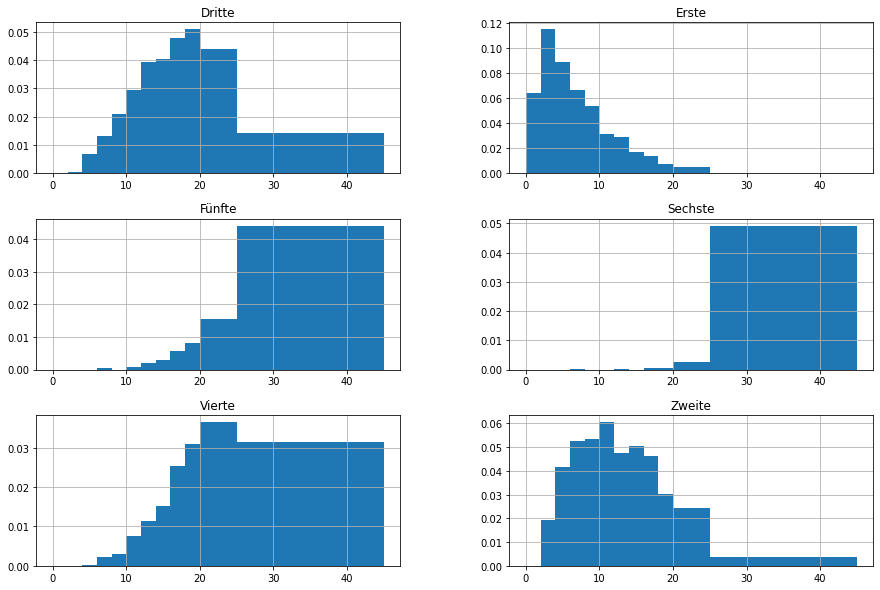

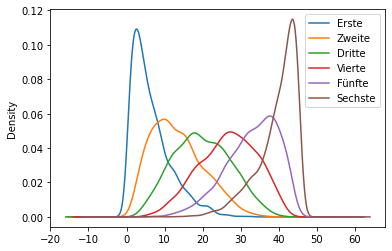

In [15]:
data[["Erste","Zweite","Dritte","Vierte","Fünfte","Sechste"]].astype(int).hist(density=True,bins=[0, 2, 4, 6,8,10,12,14,16,18,20,25,45], range=[0, 45],layout=(3,2), figsize=(15,10))
data[["Erste","Zweite","Dritte","Vierte","Fünfte","Sechste"]].astype(int).astype(int).plot.kde()

c:\users\marst\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

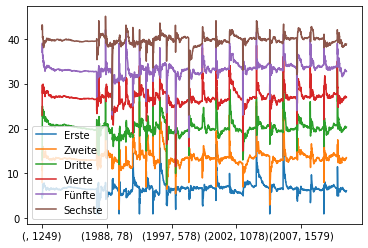

In [16]:
df = data.drop(columns=["Datum","Zusatzzahl"],axis=1).astype(int).groupby(lambda x: data['Datum'][x].split(".")[2]).expanding().mean()
df.plot()

# Generate Basic Statistics

In [17]:
import math
import statistics
import numpy as np
import scipy.stats
from itertools import chain,groupby

In [23]:
numbersdrawn=data[["Erste","Zweite","Dritte","Vierte","Fünfte","Sechste"]].astype(int).values.tolist()

[1, 20, 22, 24, 27, 40]


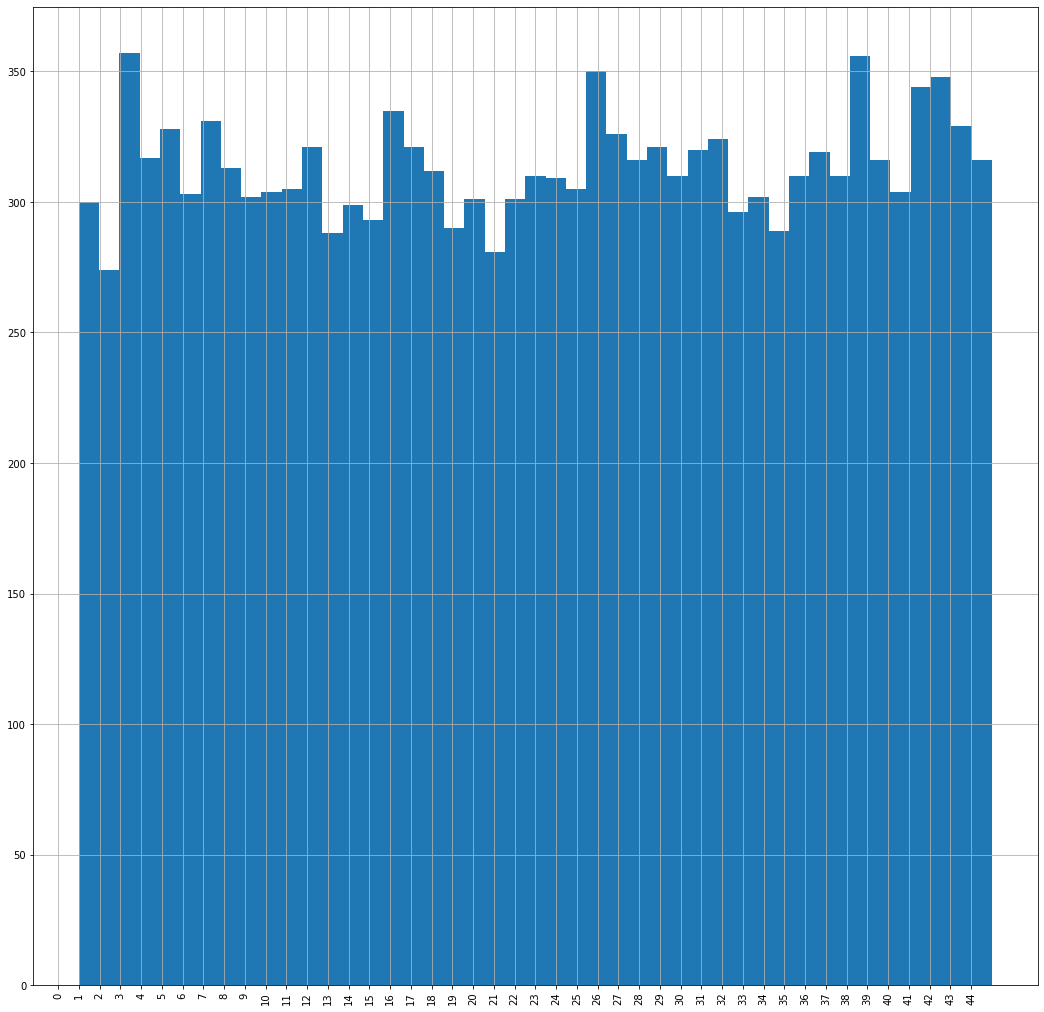

In [24]:
numbersdrawn=list(chain.from_iterable(numbersdrawn))
print(numbersdrawn[0:6])
numbers = pd.Series(numbersdrawn)
fig = plt.figure(figsize=(18, 18))
ax=numbers.hist(bins=45)
ax.set_xticks(range(45));
ax.set_xticklabels(range(45), rotation=90);

# Research Questions

## Which sets of 3 numbers are most likely to be drawn together?

A *Markov chain* is a mathematical system usually defined as a collection of random variables, that transition from one state to another according to certain probabilistic rules. These set of transition satisfies the Markov Property, which states that the probability of transitioning to any particular state is dependent solely on the current state and time elapsed, and not on the sequence of state that preceded it. This unique characteristic of Markov processes render them memoryless.

Why Markov Chains?
Markov Chains have prolific usage in mathematics. They are widely employed in economics, game theory, communication theory, genetics and finance. They arise broadly in statistical specially Bayesian statistics and information-theoretical contexts. When it comes real-world problems, they are used to postulate solutions to study cruise control systems in motor vehicles, queues or lines of customers arriving at an airport, exchange rates of currencies, etc. The algorithm known as PageRank, which was originally proposed for the internet search engine Google, is based on a Markov process.

#### Calculate the Transition Matrix

In [25]:
def transition_matrix(transitions):
    n = 1+ 45 #max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    #For each drawing count the drawn numbers
    for drawn in transitions:
        for i in drawn:
            for j in drawn:
                if i!=j:
                    M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [26]:
transitionmatrix = transition_matrix(data[["Erste","Zweite","Dritte","Vierte","Fünfte","Sechste"]].astype(int).values.tolist())
#for row in transitionmatrix: print(' '.join('{0:.2f}'.format(x)   for x in row))
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
print(check_symmetric(np.matrix(transitionmatrix)))

False


#### Frage: Starte bei gezogener nummer x was werden die anderen 3 Zahlen sein mit der größen Wahrscheinlichkeit?

In [27]:
#!pip install hmmlearn

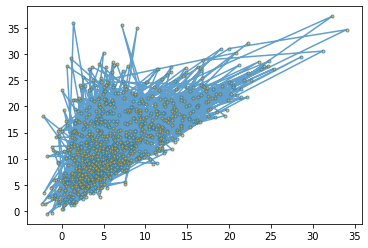

In [28]:
from hmmlearn import hmm
remodel = hmm.GaussianHMM(n_components=45, covariance_type="full", n_iter=100)
X=data[["Erste","Zweite","Dritte","Vierte","Fünfte","Sechste"]].astype(int).values.tolist()
remodel.fit(X)
#model.startprob_ = startprob
#remodel.transmat_ = transitionmatrix
#model.means_ = means
#model.covars_ = .5 * np.tile(np.identity(2), (45, 1, 1))
X, Z = remodel.sample(1000)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

In [59]:
choices=[str(x) for x in range(1,46)]
def activity_forecast(drawings):
    # Choose the starting state
    currentnumber = np.random.randint(45)+1
    activityList = [currentnumber]
    i = 0
    prob = 1
    while drawings!=len(activityList):
        currentnumber = int(np.random.choice(choices,p=transitionmatrix[currentnumber][1:]))
        if currentnumber not in activityList:
            activityList.append(currentnumber)  
    return activityList

# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,1000000):
        list_activity.append(activity_forecast(3))

# Check out all the `activityList` we collected    
#print(list_activity)


[34, 3, 40, 13, 11, 43]


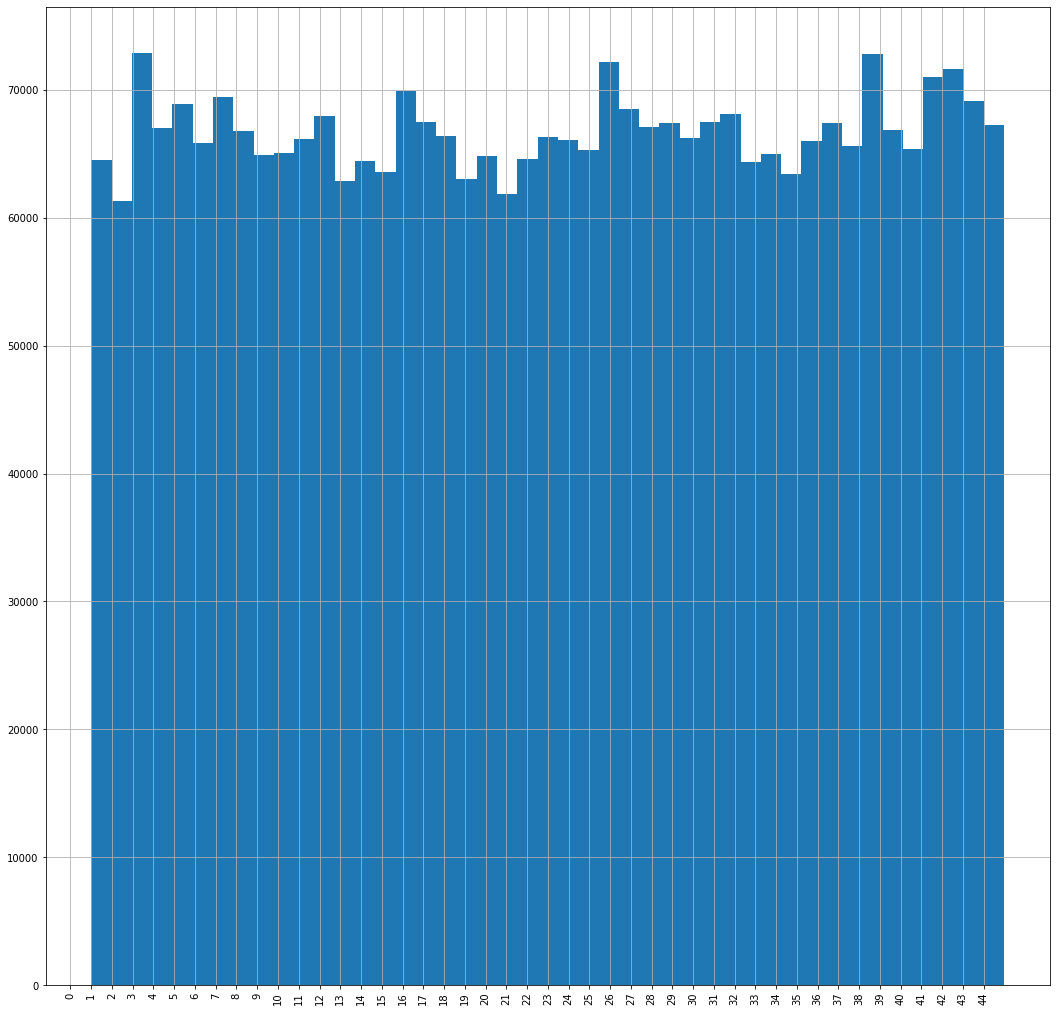

In [60]:
numbersdrawn_simulation=list(chain.from_iterable(list_activity))
print(numbersdrawn_simulation[0:6])
numbers_simulation = pd.Series(numbersdrawn_simulation)
fig = plt.figure(figsize=(18, 18))
ax=numbers_simulation.hist(bins=45)
ax.set_xticks(range(45));
ax.set_xticklabels(range(45), rotation=90);

In [ ]:

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

In [31]:
transitionmatrix[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]